In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
import math

plt.style.use('fivethirtyeight')


In [ ]:
# Veri aralığını belirle
start = datetime(2012, 1, 1)
end = datetime(2024, 2, 1)

# Veri çekme
df = yf.download('AAPL', start=start, end=end)

df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500648,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639424,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771557,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751300,394024400
...,...,...,...,...,...,...
2024-01-25,195.220001,196.270004,193.110001,194.169998,193.922546,54822100
2024-01-26,194.270004,194.759995,191.940002,192.419998,192.174774,44594000
2024-01-29,192.009995,192.199997,189.580002,191.729996,191.485657,47145600


In [ ]:
print(df.shape)

(3039, 6)


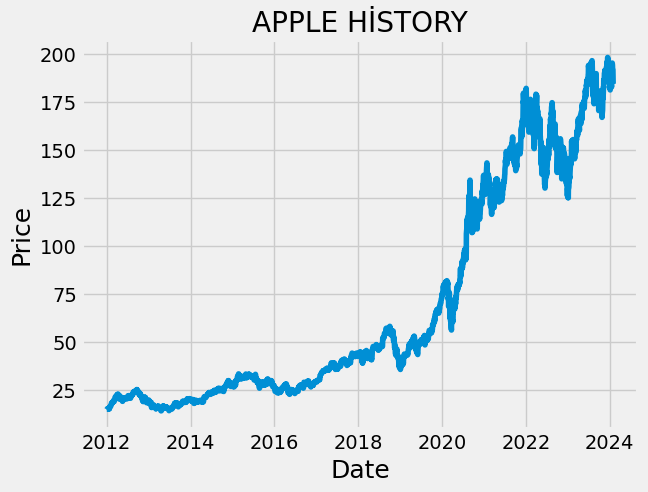

In [ ]:
plt.plot(figsize=(16,8))
plt.title("APPLE HİSTORY")
plt.plot(df['Close'])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.show()

In [ ]:
data = df.filter(["Close"])
dataset=data.values
training_data_len = math.ceil(len(data)* .8)
training_data_len

2432

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.96535666],
       [0.94531999],
       [0.92555484]])

In [ ]:
train_data = scaled_data[0:training_data_len, : ]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [ ]:
x_train , y_train = np.array(x_train) , np.array(y_train)


In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(2372, 60, 1)


In [ ]:
model = Sequential()
model.add(LSTM(50 ,return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

2372/2372 [==============================] - 83s 33ms/step - loss: 8.2344e-04


In [ ]:
test_data = scaled_data[training_data_len-60 : , : ]
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60 , len(test_data)):
  x_test.append(test_data[i-60 : i , 0 ])



In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test , (x_test.shape[0], x_test.shape[1] , 1))


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


19/19 [==============================] - 2s 25ms/step


In [ ]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
print(rmse)

2.389500965200107


<ipython-input-19-5e4a5b0b69d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


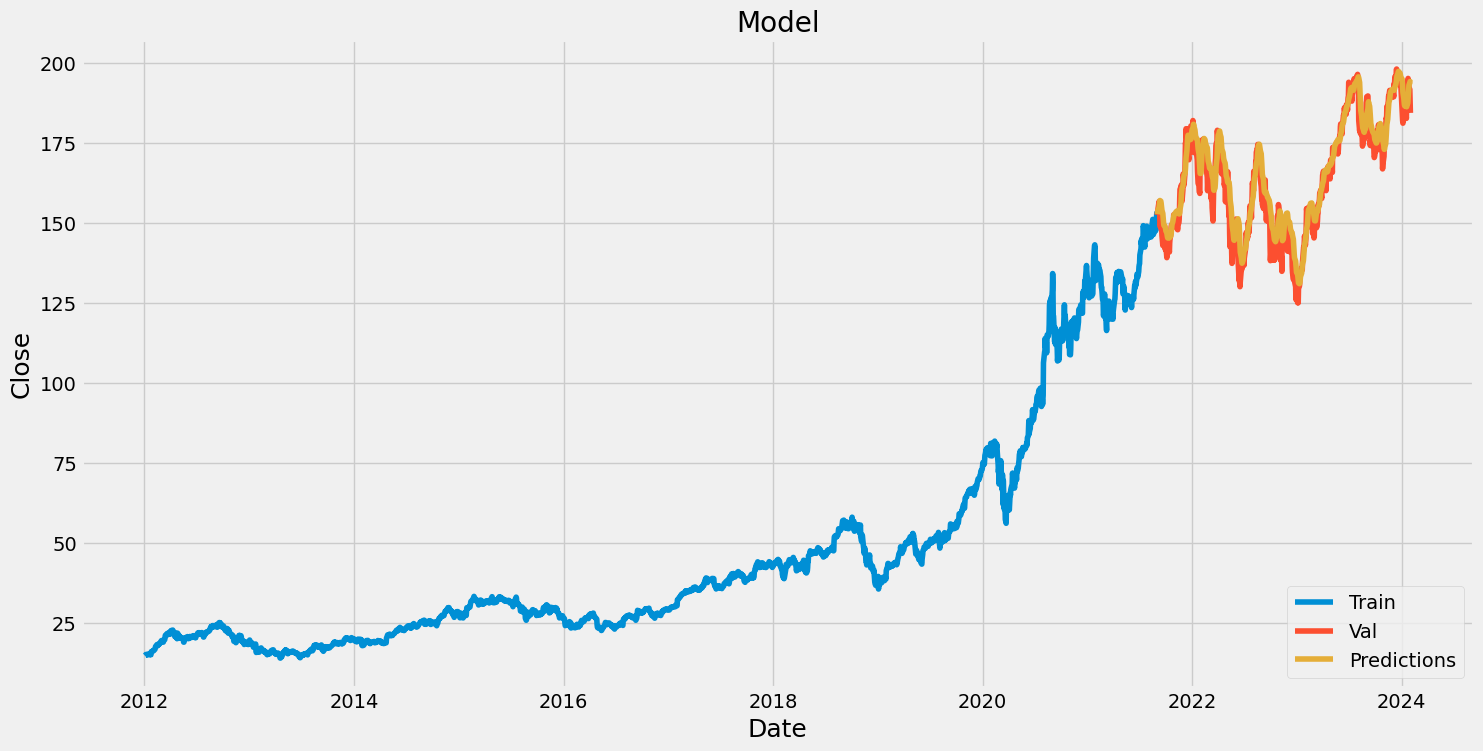

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date" , fontsize = 18)
plt.ylabel("Close" , fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'] , loc = 'lower right')
plt.show()

In [ ]:
print(valid)

                 Close  Predictions
Date                               
2021-09-01  152.509995   152.720169
2021-09-02  153.649994   153.316437
2021-09-03  154.300003   154.013077
2021-09-07  156.690002   154.759705
2021-09-08  155.110001   155.701019
...                ...          ...
2024-01-25  194.169998   191.838257
2024-01-26  192.419998   193.058105
2024-01-29  191.729996   193.836761
2024-01-30  188.039993   194.215683
2024-01-31  184.399994   193.945480

[607 rows x 2 columns]


In [ ]:
# Veri aralığını belirle
start1 = datetime(2012, 1, 1)
end1 = datetime(2024, 2, 1)

# Veri çekme
apple_quote = yf.download('AAPL', start=start, end=end)

new_df = apple_quote.filter(["Close"])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test , (X_test.shape[0] ,X_test.shape[1] , 1 ))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 148ms/step
[[192.97874]]


In [ ]:
# Veri aralığını belirle
start2 = datetime(2024, 1, 31)
end2 = datetime(2024, 1, 31)

# Veri çekme
apple_quote2 = yf.download('AAPL', start=start, end=end)
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2012-01-03     14.686786
2012-01-04     14.765714
2012-01-05     14.929643
2012-01-06     15.085714
2012-01-09     15.061786
                 ...    
2024-01-25    194.169998
2024-01-26    192.419998
2024-01-29    191.729996
2024-01-30    188.039993
2024-01-31    184.399994
Name: Close, Length: 3039, dtype: float64
